not too many variables
two different objects and 2 clustering analysis than combine into one result
value - value of customer in company
one for usage and one for value - 2 clusters
two for different purposes and than join together if want
PCA -> don't use it
objective of segmentation - useful to manage infinit possibilities
use of PCA - welcome to use it but be carfeul - more subjective

In [164]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from ydata_profiling import ProfileReport
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

sns.set()

In [165]:
df = pd.read_csv("/Users/helenamashayekhi/Documents/Master's/Data Mining/group_project/XYZ_sports_dataset.csv", sep=';')

In [166]:
df.head(50)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
5,10005,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,...,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1
6,10006,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,...,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1
7,10007,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,...,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1
8,10008,29,Male,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,...,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1
9,10009,14,Female,0.0,2016-07-07,2017-02-01,2016-07-01,2017-06-30,2016-11-19,74,...,0.0,6.0,6,2.0,17.72,0,2,0.0,0,1


In [167]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,14942.0,NaN,NaN,NaN,17470.5,4313.528196,10000.0,13735.25,17470.5,21205.75,24941.0
Age,14942.0,NaN,NaN,NaN,26.015794,14.156582,0.0,19.0,23.0,31.0,87.0
Gender,14942,2,Female,8931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,14447.0,NaN,NaN,NaN,2230.816086,1566.527734,0.0,1470.0,1990.0,2790.0,10890.0
EnrollmentStart,14942,1490,2015-03-02,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnrollmentFinish,14942,1300,2015-09-16,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodStart,14942,12,2019-07-01,3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodFinish,14942,11,2019-12-31,3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateLastVisit,14942,1384,2019-10-31,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.0,13.0,41.0,83.75,1745.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [169]:
df.isnull().sum().head(50)

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [170]:
df.isnull().sum().tail(50)

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [171]:
df.duplicated().value_counts()

False    14942
dtype: int64

In [172]:
df.shape

(14942, 31)

In [173]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [174]:
df=df[df.columns[df.isnull().sum() < 7471]] # eliminate columns with 50% or more of missing values

In [175]:
df.shape 

(14942, 31)

<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

<hr>
<a class="anchor" id="fillemptycells">
    
## 4.1 Fill empty cells
    
</a>

In [176]:
df_central = df.copy()

In [177]:
df_central.replace(" ", np.nan, inplace=True)

<a class="anchor" id="metricandnonmetric">

## 4.2. METRIC and NON METRIC FEATURES

</a>

In [178]:
df_central.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

In [179]:
non_metric_features = ["Gender", "EnrollmentStart", "EnrollmentFinish", "LastPeriodStart", "LastPeriodFinish", "DateLastVisit", ]
metric_features = df_central.columns.drop(non_metric_features).to_list()

<a class="anchor" id="fillmissingvalues">

## 4.3. Filling Missing Values - 2ND TIME

</a>


In [180]:
df_central.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [181]:
df_central[metric_features].median()

ID                            17470.50
Age                              23.00
Income                         1990.00
DaysWithoutFrequency             41.00
LifetimeValue                   166.20
UseByTime                         0.00
AthleticsActivities               0.00
WaterActivities                   0.00
FitnessActivities                 1.00
DanceActivities                   0.00
TeamActivities                    0.00
RacketActivities                  0.00
CombatActivities                  0.00
NatureActivities                  0.00
SpecialActivities                 0.00
OtherActivities                   0.00
NumberOfFrequencies              18.00
AttendedClasses                   0.00
AllowedWeeklyVisitsBySLA          7.00
AllowedNumberOfVisitsBySLA       38.99
RealNumberOfVisits                4.00
NumberOfRenewals                  1.00
HasReferences                     0.00
NumberOfReferences                0.00
Dropout                           1.00
dtype: float64

In [182]:
modes = df_central[non_metric_features].mode().loc[0]
modes

Gender                  Female
EnrollmentStart     2015-03-02
EnrollmentFinish    2015-09-16
LastPeriodStart     2019-07-01
LastPeriodFinish    2019-12-31
DateLastVisit       2019-10-31
Name: 0, dtype: object

In [183]:
df_central.fillna(df_central[metric_features].median(), inplace=True)
df_central.fillna(modes, inplace=True)
df_central.isna().sum()

ID                            0
Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: i

In [184]:
df_neighbors = df.copy()

In [185]:
nans_index = df_neighbors.isna().any(axis=1)
df_neighbors[nans_index]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
19,10019,28,Male,2510.0,2019-10-01,2019-10-31,2019-07-01,2019-12-31,2019-10-21,10,...,0.0,2.0,0,NaN,24.01,2,0,0.0,0,0
34,10034,74,Female,5210.0,2019-10-01,2019-10-31,2019-07-01,2019-12-31,2019-10-11,20,...,0.0,4.0,0,NaN,30.03,4,0,0.0,0,0
68,10068,43,Female,NaN,2016-09-16,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,214.0,0,7.0,21.98,9,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,24904,21,Female,1820.0,2019-09-23,2019-10-31,2019-07-01,2019-12-31,2019-10-28,3,...,0.0,9.0,0,NaN,21.98,5,0,0.0,0,0
14910,24910,25,Male,1600.0,2014-09-03,2015-09-14,2015-01-01,2015-06-30,2014-12-15,273,...,0.0,17.0,17,3.0,25.29,0,1,0.0,0,1
14929,24929,32,Female,4050.0,2017-10-31,2018-03-10,2018-01-01,2018-06-30,2018-01-29,40,...,NaN,8.0,0,7.0,59.01,5,0,0.0,0,1
14930,24930,4,Male,NaN,2017-06-30,2017-11-07,2017-07-01,2017-12-31,2017-09-30,38,...,0.0,5.0,5,2.0,17.42,7,1,0.0,0,1


In [186]:
# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_neighbors[metric_features] = imputer.fit_transform(df_neighbors[metric_features])

In [187]:
# See rows with NaNs imputed
df_neighbors.loc[nans_index, metric_features]

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000.0,60.0,5500.0,1.0,89.35,0.0,0.0,0.0,1.0,0.0,...,0.0,9.0,7.0,5.0,6.28,2.0,0.0,0.0,0.0,0.0
4,10004.0,35.0,4320.0,210.0,373.20,0.0,0.0,0.0,1.0,0.0,...,0.0,41.0,0.0,7.0,60.97,0.0,3.0,0.0,0.0,1.0
19,10019.0,28.0,2510.0,10.0,52.00,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,5.2,24.01,2.0,0.0,0.0,0.0,0.0
34,10034.0,74.0,5210.0,20.0,38.50,0.0,0.0,0.0,1.0,0.0,...,0.0,4.0,0.0,5.0,30.03,4.0,0.0,0.0,0.0,0.0
68,10068.0,43.0,3256.0,1.0,849.80,1.0,0.0,0.0,1.0,0.0,...,0.0,214.0,0.0,7.0,21.98,9.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,24904.0,21.0,1820.0,3.0,54.80,0.0,0.0,0.0,1.0,0.0,...,0.0,9.0,0.0,6.0,21.98,5.0,0.0,0.0,0.0,0.0
14910,24910.0,25.0,1600.0,273.0,285.20,0.0,0.0,1.0,0.0,0.0,...,0.0,17.0,17.0,3.0,25.29,0.0,1.0,0.0,0.0,1.0
14929,24929.0,32.0,4050.0,40.0,134.60,0.0,0.0,0.0,1.0,0.0,...,0.0,8.0,0.0,7.0,59.01,5.0,0.0,0.0,0.0,1.0
14930,24930.0,4.0,1874.0,38.0,77.60,0.0,0.0,1.0,0.0,0.0,...,0.0,5.0,5.0,2.0,17.42,7.0,1.0,0.0,0.0,1.0


In [188]:
df = df_central.copy()

__Outliers__


___Outlier removal___

In [189]:
#q25 = df[metric_features].quantile(.25)
#q75 = df[metric_features].quantile(.75)
#iqr = (q75 - q25)

#upper_lim = q75 + 1.5 * iqr
#lower_lim = q25 - 1.5 * iqr

#filters2 = []
#for metric in metric_features:
#    llim = lower_lim[metric]
#    ulim = upper_lim[metric]
#    filters2.append(df[metric].between(llim, ulim, inclusive='both'))

#filters2 = pd.Series(np.all(filters2, 0))
#sports_data_2 = df[filters2]
#print('Percentage of data kept after removing outliers:', np.round(sports_data_2.shape[0] / df.shape[0], 4))

___combining outlier methods___

In [190]:
#sports_data_3 = sports_data[(filters1 | filters2)]
#print('Percentage of data kept after removing outliers:', np.round(sports_data_3.shape[0] / sports_data_original.shape[0], 4))

__Feature Enginieering__

0 ID - Unique identifier of the record
1 Age - Age of the user 
2 Gender - Gender of the user 
3 Income - Monthly salary of user
4 EnrollmentStart - Date of first enrollment
5 EnrollmentFinish - Finish date of last enrollment
6 LastPeriodStart - Start date of the last activity or the last two months if less
7 LastPeriodFinish - End date of last activity or last two months if less
8 DateLastVisit - Date and time of the user’s last visit to the sport facility
9 DaysWithoutFrequency - Number of days the user did not visit the facilty before being considered a dropout
10 LifetimeValue - Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish)
11 UseByTime - user was enrolled in this form of use 
12 AthleticsActivities - user was ever enrolled in athletics activities
13 WaterActivities - user was ever enrolled in water activities 
14 FitnessActivities - Indicates if the user was ever enrolled in fitness activities 
15 DanceActivities - user was ever enrolled in dance activites 
16 TeamActivities - user was ever enrolled in team activities 
17 RacketActivities - user was ever enrolled in racket activities 
18 CombatActivities - user was ever enrolled in combat sports activites 
19 NatureActivities - user was ever enrolled in nature activities 
20 SpecialActivities - user was enrolled in sports for disabled people 
21 OtherActivities - user was ever enrolled in other activities that does not fall into the other categories 
22 NumberOfFrequencies - Number of visits to the sports facility 
23 AttendedClasses - Number of classes the user attended 
24 AllowedWeeklyVisitsBySLA - number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
25 AllowedNumberOfVisitsBySLA - total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
26 RealNumberOfVisits - actual number of visits that the user made to the facilities in the last period his registration (between LastPeriodStart and LastPeriodFinish)
27 NumberOfRenewals - Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)
28 HasReferences - This field contains the value True if NumberOfReferences> 0, or False otherwise
29 NumberOfReferences - Number of people with which the user is related by family relationship or friendship
30 Dropout - Represents the user’s enrollment status, assuming the value True if he is quitting or False if he is not
  

In [191]:
df.loc[df["EnrollmentStart"] == df["EnrollmentFinish"], "EnrollmentFinish"] = df["LastPeriodFinish"]

In [192]:
df.head(50)


,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,7.0,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,0.0,41.0,0,7.0,60.97,0,3,0.0,0,1
5,10005,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,...,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1
6,10006,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,...,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1
7,10007,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,...,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1
8,10008,29,Male,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,...,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1
9,10009,14,Female,0.0,2016-07-07,2017-02-01,2016-07-01,2017-06-30,2016-11-19,74,...,0.0,6.0,6,2.0,17.72,0,2,0.0,0,1


In [193]:
#maybe column for how long they were at gym
#from datetime import datetime
#start_date = datetime.strptime('8.18.2014', "%m/%d/%Y")
#end_date = datetime.strptime('9/26/2008', "%m/%d/%Y")
#print abs((end_date-start_date).days)

In [ ]:
pd.to_datetime(df["EnrollmentStart"].iloc[0]

In [220]:
c = df.corr(method="spearman").abs()
s = c.unstack()
so = round(s.sort_values(kind="quicksort"),4)
high_pairs = so[so > 0.50]
high_pairs = high_pairs[high_pairs < 1.0]

/var/folders/8f/lkffd0t922vg2dwwqj3ryvr80000gn/T/ipykernel_20983/565915734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr(method="spearman").abs()


In [219]:
pd.set_option('display.max_rows', 562)
high_pairs

FitnessActivities           DaysWithoutFrequency          0.0001
DaysWithoutFrequency        FitnessActivities             0.0001
Dropout                     ID                            0.0002
ID                          Dropout                       0.0002
Age                         NumberOfRenewals              0.0003
NumberOfRenewals            Age                           0.0003
AthleticsActivities         ID                            0.0007
ID                          AthleticsActivities           0.0007
LifetimeValue               OtherActivities               0.0009
OtherActivities             LifetimeValue                 0.0009
LifetimeValue               ID                            0.0014
ID                          LifetimeValue                 0.0014
UseByTime                   WaterActivities               0.0028
WaterActivities             UseByTime                     0.0028
Dropout                     CombatActivities              0.0028
CombatActivities         

In [216]:
so_low = round(s.sort_values(kind="quicksort"),4)
low_pairs = so_low[so_low < 0.05]

In [217]:
pd.set_option('display.max_rows', 562)
low_pairs

FitnessActivities           DaysWithoutFrequency          0.0001
DaysWithoutFrequency        FitnessActivities             0.0001
Dropout                     ID                            0.0002
ID                          Dropout                       0.0002
Age                         NumberOfRenewals              0.0003
NumberOfRenewals            Age                           0.0003
AthleticsActivities         ID                            0.0007
ID                          AthleticsActivities           0.0007
LifetimeValue               OtherActivities               0.0009
OtherActivities             LifetimeValue                 0.0009
LifetimeValue               ID                            0.0014
ID                          LifetimeValue                 0.0014
UseByTime                   WaterActivities               0.0028
WaterActivities             UseByTime                     0.0028
Dropout                     CombatActivities              0.0028
CombatActivities         

<hr>
<a class="anchor" id="selection">
    
# 5. Variable Selection
    
</a>

<hr>
<a class="anchor" id="selection">
    
# 6. Data Normalization
    
</a>

In [198]:
df_minmax = df.copy()

In [199]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[metric_features])
scaled_feat

array([[0.00000000e+00, 6.89655172e-01, 5.05050505e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.69299244e-05, 3.33333333e-01, 2.41505969e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.33859849e-04, 2.64367816e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99866140e-01, 2.29885057e-01, 1.66207530e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99933070e-01, 6.32183908e-01, 4.40771350e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.67816092e-01, 3.39761249e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [200]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [1.0e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00
 1.0e+00 5.6e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00] 
 [2.4941e+04 8.7000e+01 1.0890e+04 1.7450e+03 6.7278e+03 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 1.0310e+03 5.8100e+02
 7.0000e+00 2.4003e+02 8.4000e+01 6.0000e+00 1.0000e+00 3.0000e+00
 1.0000e+00]


In [201]:
df_minmax[metric_features] = scaled_feat
df_minmax.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,0.000000,0.689655,Female,0.505051,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,0.000573,...,0.0,0.007767,0.012048,1.000000,0.023886,0.023810,0.000000,0.0,0.0,0.0
1,0.000067,0.333333,Female,0.241506,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,0.034384,...,0.0,0.021359,0.001721,0.166667,0.070405,0.011905,0.333333,0.0,0.0,1.0
2,0.000134,0.264368,Male,0.181818,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,0.004011,...,0.0,0.004854,0.000000,1.000000,0.123063,0.071429,0.000000,0.0,0.0,1.0
3,0.000201,0.103448,Male,0.000000,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,0.012607,...,0.0,0.018447,0.003442,0.166667,0.071658,0.035714,0.000000,0.0,0.0,1.0
4,0.000268,0.402299,Male,0.396694,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,0.120344,...,0.0,0.038835,0.000000,1.000000,0.252265,0.000000,0.500000,0.0,0.0,1.0


In [202]:

# Checking max and min of minmaxed variables
df_minmax[metric_features].describe().round(2)

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.0,...,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.0
mean,0.50,0.30,0.20,0.05,0.04,0.05,0.01,0.30,0.58,0.0,...,0.00,0.04,0.02,0.80,0.17,0.06,0.20,0.02,0.01,0.8
std,0.29,0.16,0.14,0.08,0.05,0.21,0.09,0.46,0.49,0.0,...,0.04,0.06,0.05,0.35,0.09,0.08,0.23,0.14,0.06,0.4
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,0.25,0.22,0.14,0.01,0.01,0.00,0.00,0.00,0.00,0.0,...,0.00,0.01,0.00,0.50,0.11,0.01,0.00,0.00,0.00,1.0
50%,0.50,0.26,0.18,0.02,0.02,0.00,0.00,0.00,1.00,0.0,...,0.00,0.02,0.00,1.00,0.16,0.05,0.17,0.00,0.00,1.0
75%,0.75,0.36,0.25,0.05,0.05,0.00,0.00,1.00,1.00,0.0,...,0.00,0.04,0.01,1.00,0.25,0.08,0.33,0.00,0.00,1.0
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


In [203]:
df_standard = df.copy()

In [204]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_standard[metric_features])
scaled_feat

array([[-1.73193489,  2.40067425,  2.12676938, ..., -0.14240772,
        -0.13363285, -2.00604332],
       [-1.73170306,  0.21080691,  0.26423445, ..., -0.14240772,
        -0.13363285,  0.49849372],
       [-1.73147122, -0.21303838, -0.15759402, ..., -0.14240772,
        -0.13363285,  0.49849372],
       ...,
       [ 1.73147122, -0.42496102, -0.26791839, ..., -0.14240772,
        -0.13363285,  0.49849372],
       [ 1.73170306,  2.04746984,  1.67249256, ..., -0.14240772,
        -0.13363285, -2.00604332],
       [ 1.73193489,  0.42272956,  0.958629  , ..., -0.14240772,
        -0.13363285,  0.49849372]])

In [205]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [1.74705000e+04 2.60157944e+01 2.22283831e+03 8.12249364e+01
 3.02561871e+02 4.71155133e-02 7.36179896e-03 2.95475840e-01
 5.77031187e-01 0.00000000e+00 5.54142685e-02 2.33569803e-02
 1.07683041e-01 0.00000000e+00 2.64355508e-02 1.87391246e-03
 4.00820506e+01 1.01524562e+01 5.80397537e+00 4.16362990e+01
 5.32070673e+00 1.20526034e+00 1.98768572e-02 2.22861732e-02
 8.00963726e-01] 
 [1.86052802e+07 2.00395414e+02 2.37440579e+06 2.07921260e+04
 1.32719863e+05 4.48956417e-02 7.30760287e-03 2.08169868e-01
 2.44066196e-01 0.00000000e+00 5.23435274e-02 2.28114318e-02
 9.60874038e-02 0.00000000e+00 2.57367125e-02 1.87040091e-03
 4.27896275e+03 8.49910635e+02 4.38166536e+00 4.43753641e+02
 4.01036791e+01 1.90787489e+00 1.94817677e-02 2.78127897e-02
 1.59420835e-01]


In [206]:
df_standard[metric_features] = scaled_feat
df_standard.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,-1.731935,2.400674,Female,2.126769,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,-0.556365,...,-0.043329,-0.475161,-0.108134,0.571374,-1.678401,-0.524371,-0.872581,-0.142408,-0.133633,-2.006043
1,-1.731703,0.210807,Female,0.264234,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,-0.147196,...,-0.043329,-0.261138,-0.313943,-1.817264,-1.149574,-0.682280,0.575374,-0.142408,-0.133633,0.498494
2,-1.731471,-0.213038,Male,-0.157594,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,-0.514755,...,-0.043329,-0.521022,-0.348245,0.571374,-0.550963,0.107267,-0.872581,-0.142408,-0.133633,0.498494
3,-1.731239,-1.202011,Male,-1.442548,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,-0.410729,...,-0.043329,-0.307000,-0.279642,-1.817264,-1.135332,-0.366461,-0.872581,-0.142408,-0.133633,0.498494
4,-1.731008,0.634652,Male,1.360988,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,0.893063,...,-0.043329,0.014033,-0.348245,0.571374,0.917792,-0.840189,1.299351,-0.142408,-0.133633,0.498494


In [207]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2)

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.0,...,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00,14942.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-1.84,-1.44,-0.56,-0.83,-0.22,-0.09,-0.65,-1.17,0.0,...,-0.04,-0.60,-0.35,-2.29,-1.95,-0.84,-0.87,-0.14,-0.13,-2.01
25%,-0.87,-0.50,-0.48,-0.47,-0.60,-0.22,-0.09,-0.65,-1.17,0.0,...,-0.04,-0.51,-0.35,-0.86,-0.76,-0.68,-0.87,-0.14,-0.13,0.50
50%,0.00,-0.21,-0.15,-0.28,-0.37,-0.22,-0.09,-0.65,0.86,0.0,...,-0.04,-0.34,-0.35,0.57,-0.13,-0.21,-0.15,-0.14,-0.13,0.50
75%,0.87,0.35,0.34,0.02,0.14,-0.22,-0.09,1.54,0.86,0.0,...,-0.04,0.08,-0.25,0.57,0.92,0.27,0.58,-0.14,-0.13,0.50
max,1.73,4.31,5.62,11.54,17.64,4.50,11.61,1.54,0.86,0.0,...,23.08,15.15,19.58,0.57,9.42,12.42,3.47,7.02,17.86,0.50


In [208]:
df = df_standard.copy()

<hr>
<a class="anchor" id="selection">
    
# 7. Hierarchical clustering
    
</a>

In [209]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])
hc_labels


array([4, 3, 4, ..., 4, 1, 4])

In [210]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

/var/folders/8f/lkffd0t922vg2dwwqj3ryvr80000gn/T/ipykernel_20983/3716061603.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat.groupby('labels').mean()


,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
labels,,,,,,,,,,,,,,,,,,,,,
0,-0.013753,-0.094973,-0.092333,-0.001250,-0.151376,-0.193989,0.765641,-0.515841,-0.771828,0.0,...,-0.043329,-0.254501,-0.280489,0.402239,0.490625,-0.388824,-0.145702,-0.118478,-0.113605,0.063504
1,0.029852,-0.568339,-0.534293,-0.150125,0.701136,-0.190046,-0.082781,0.862541,-1.008615,0.0,...,-0.043329,0.313110,0.792758,-1.389013,-0.869229,-0.082765,0.395670,-0.140364,-0.126790,-0.371127
2,-0.063055,-0.638774,-0.661618,0.243139,1.440798,-0.080303,-0.086119,0.965050,-0.748280,0.0,...,-0.043329,0.520661,1.319681,-1.179761,-0.727630,-0.249746,1.112909,6.806437,6.363946,-0.121358
3,-0.035663,1.403101,1.123628,-0.151275,0.445984,0.046626,-0.086119,-0.329635,-0.381414,0.0,...,1.633942,0.770358,0.081324,-0.121702,-0.252732,0.354358,0.515355,-0.142408,-0.133633,-0.293096
4,-0.005556,0.192717,0.191791,0.055511,-0.306194,0.104001,-0.086119,-0.260649,0.546902,0.0,...,-0.043329,-0.126364,-0.300886,0.504167,0.283879,0.087526,-0.183727,-0.141634,-0.133633,0.146424


In [211]:
# Computing SST
X = df[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [212]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

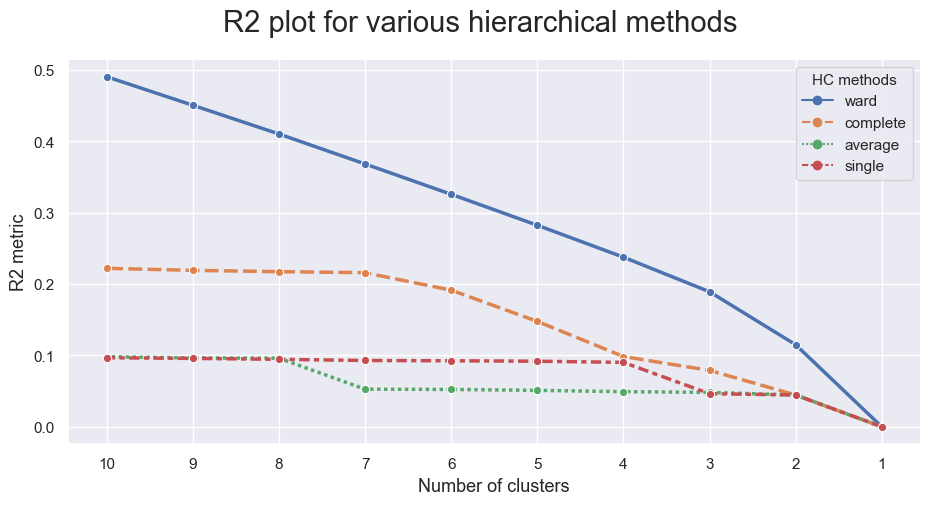

In [213]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()